In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones
# de transformación del dataframe original df_dist

# Tomar la dirección URL del archivo en formato 'raw'
url = 'https://raw.githubusercontent.com/MarioGHdz/FisicaComputacional1/master/Actividad%201/Datos%20diarios.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.month

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16499 entries, 0 to 16498
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   16499 non-null  datetime64[ns]
 1   Precip  16498 non-null  float64       
 2   Evap    11586 non-null  float64       
 3   Tmax    16465 non-null  float64       
 4   Tmin    16467 non-null  float64       
 5   Año     16499 non-null  int64         
 6   Mes     16499 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 902.4 KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1969-05-01     0.0   9.0  30.5   8.5  1969    5
1 1969-05-02     0.0   9.1  30.5   8.5  1969    5
2 1969-05-03     0.0   9.0  30.0   9.0  1969    5
3 1969-05-04     0.0   7.1  27.5  12.0  1969    5
4 1969-05-05     5.0   4.3  28.0   7.5  1969    5
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
16494 2016-04-26     0.0   NaN  29.0   8.0  2016    4
16495 2016-04-27 

In [ ]:
#Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16499 entries, 0 to 16498
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   16499 non-null  datetime64[ns]
 1   Precip  16498 non-null  float64       
 2   Evap    11586 non-null  float64       
 3   Tmax    16465 non-null  float64       
 4   Tmin    16467 non-null  float64       
 5   Año     16499 non-null  int64         
 6   Mes     16499 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 902.4+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1969-05-01     0.0   9.0  30.5   8.5  1969  May
1 1969-05-02     0.0   9.1  30.5   8.5  1969  May
2 1969-05-03     0.0   9.0  30.0   9.0  1969  May
3 1969-05-04     0.0   7.1  27.5  12.0  1969  May
4 1969-05-05     5.0   4.3  28.0   7.5  1969  May


**Análisis Exploratorio de Datos**

(EDA: Exploratory Data Analysis)

Iniciaremos una colección de funciones para realizar los que se llama **Análisis Exploratorio de Datos**.

El EDA, como su nombre lo indica, nos concentramos en investigar todo lo relacionado con la forma y contenido del DatFrame.

Entre algunas las características en las nos centramos por ejemplo son:



*   Estructuras/patrones en los datos
*   Número de datos faltantes
*   Detección de datos anómalos y valores extremos
*   Extraer y seleccionar variables importantes
*   Probar alguna teoría de comportamiento de los datos

Aplicamos una serie de funciones al DatFrame para caracterizarlo. Ya hemos utilizado algunas de ellas en la Actividad anterior, y agregaremos un conjunto adicional de ellas.

**Descripción general de un DataFrame**

Lista de funciones a aplicar:

1. df.shape : Forma y dimensiones de df.
2. df.types : Tipo de datos de las columnas (numéricas o categóricas)
3. df.head(), df.tail(), df.sample(5) : Despliege de un número de    renglones, para ver la estructura de df, nombres de columnas o si los datos tienen sentido a lo esperado.
4. df.info() : Proporciona información general de la estructura y componentes de df
5. df.describe() : Descripción estadística de las variables numéricas.
6. df.describe(include='object') : Descripción estadística de las variables categóricas.
7. df.isnull().sum() : Suma de valores faltantes.

**Visualización de datos**.

Dentro de las acciones que requerimos realizar para comprender un conjunto de datos es visualizarlos con ayuda de las bibliotecas de Pyton: Matplotlib, Seaborn y otras.

Se pueden visualizar las características de variables numéricas mediante:

* Histogramas
* Distribuciones de Probabilidad
* Gráficas de caja (BoxPlots)

**Uso de la biblioteca Matplotlib**

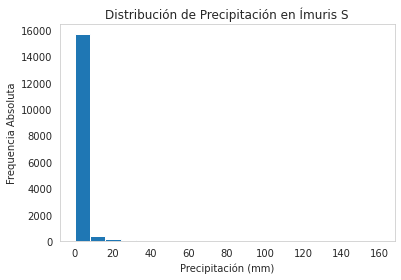

In [ ]:
# Elaboración de Histogramas
# Utilizamos Matplotlib.Pyplot, abreviado como plt 
# NOTA: Usaremos la notación equivalente de columnas, df['Variable'] = df.Variable

plt.hist(df_meteo.Precip, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en Ímuris S')
plt.grid()
plt.show()

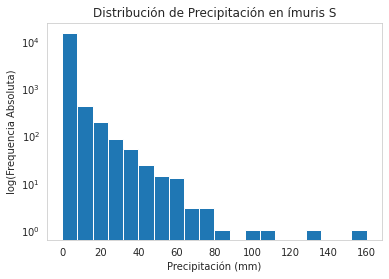

In [ ]:
# Repetimos la gráfica utilizando escala logarítmica en el Eje y para mejor visualización
plt.hist(df_meteo.Precip, bins=20)
plt.yscale('log')
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en ímuris S')
plt.grid()
plt.show()

**Uso de la biblioteca Seaborn**

**Gráficas de histogramas: sns.histplot()**

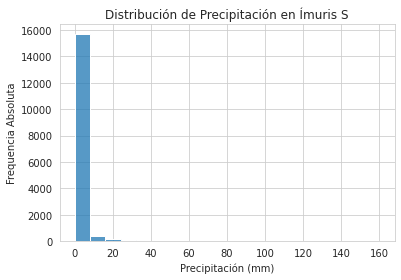

In [ ]:
# Misma gráfica utilizando la biblioteca Seaborn
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en Ímuris S')
sns.histplot(data=df_meteo, x='Precip', bins=20);

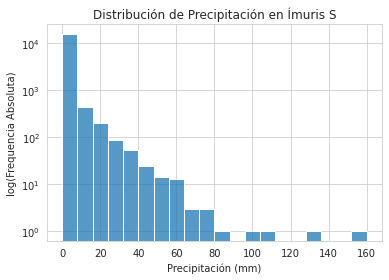

In [ ]:
# Repetimos la gráfica utilizando escala logarítmica sólo en el eje y
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en Ímuris S')
sns.histplot(data=df_meteo, x='Precip', bins=20, log_scale=(False,True));

**Histogramas de las Temperaturas Máximas y Mínimas**.

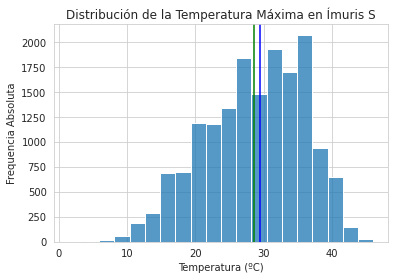

In [ ]:
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmax.median() 
Tprom = df_meteo.Tmax.mean()

sns.histplot(data=df_meteo, x='Tmax', bins=20);
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Tmed, color = 'b', label = 'm') 
plt.axvline(x = Tprom, color = 'g', label = 'x')

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Ímuris S')

plt.show()

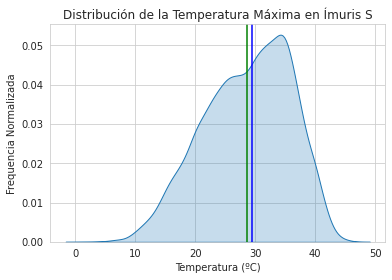

In [ ]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Tmax, fill=True);
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Ímuris S')

plt.show()

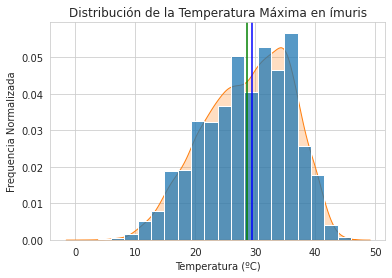

In [ ]:
# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Tmax', bins=20, stat='density');
sns.kdeplot(df_meteo.Tmax, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en ímuris')

plt.show()

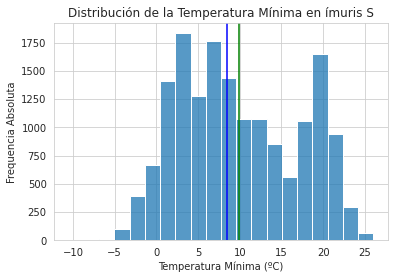

In [ ]:
# Gráfica de la Temperatura Mínima
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmin.median() 
Tprom = df_meteo.Tmin.mean()

sns.histplot(data=df_meteo, x='Tmin', bins=20);
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura Mínima (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en ímuris S')

plt.show()

In [ ]:
print(Tmed)
print(Tprom)

8.5
9.875223173619963


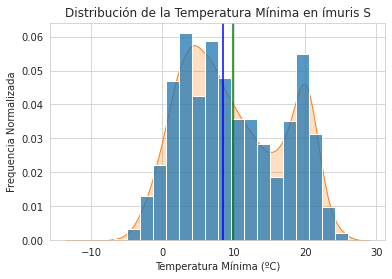

In [ ]:

# Gráfica de la Temperatura Mínima y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmin.median() 
Tprom = df_meteo.Tmin.mean()

sns.histplot(data=df_meteo, x='Tmin', bins=20, stat='density');
sns.kdeplot(df_meteo.Tmin, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura Mínima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en ímuris S')

plt.show()

**Histograma de Precipitación**

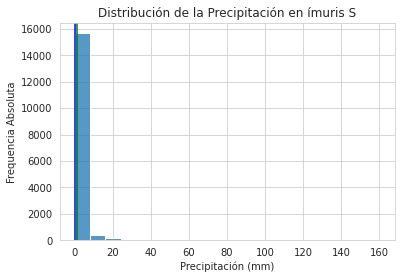

In [ ]:
# Gráfica de la Precipitación
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Pmed = df_meteo.Precip.median() 
Pprom = df_meteo.Precip.mean()

sns.histplot(data=df_meteo, x='Precip', bins=20);
plt.axvline(Pmed, color = 'b'); 
plt.axvline(Pprom, color = 'g');

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Precipitación en ímuris S')

plt.show()

In [ ]:
print(Pmed)
print(Pprom)

0.0
1.2347436052854928


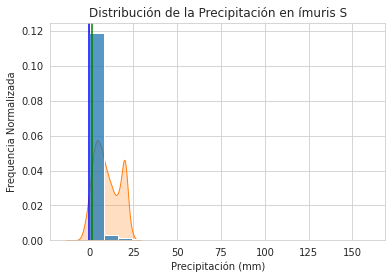

In [ ]:
# Gráfica de la Precipitación y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Pmed = df_meteo.Precip.median() 
Pprom = df_meteo.Precip.mean()

sns.histplot(data=df_meteo, x='Precip', bins=20, stat='density');
sns.kdeplot(df_meteo.Tmin, fill=True);

plt.axvline(Pmed, color = 'b'); 
plt.axvline(Pprom, color = 'g');

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en ímuris S')

plt.show()

**Histograma de Evaporación**




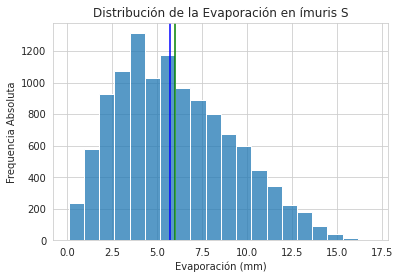

In [ ]:
# Gráfica de la Evaporación
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Emed = df_meteo.Evap.median() 
Eprom = df_meteo.Evap.mean()

sns.histplot(data=df_meteo, x='Evap', bins=20);
plt.axvline(Emed, color = 'b'); 
plt.axvline(Eprom, color = 'g');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Evaporación en ímuris S')

plt.show()


In [ ]:
print(Emed)
print(Eprom)

5.7
6.026601070257203


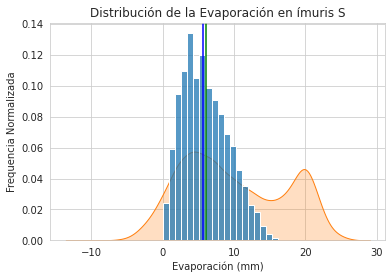

In [ ]:
# Gráfica de la Evaporación y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Emed = df_meteo.Evap.median() 
Eprom = df_meteo.Evap.mean()

sns.histplot(data=df_meteo, x='Evap', bins=20, stat='density');
sns.kdeplot(df_meteo.Tmin, fill=True);

plt.axvline(Emed, color = 'b'); 
plt.axvline(Eprom, color = 'g');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en ímuris S')

plt.show()

**Gráficas de Cajas (Boxplots): sns.boxplot()**

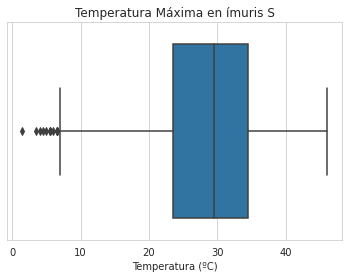

In [ ]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Máxima en ímuris S');

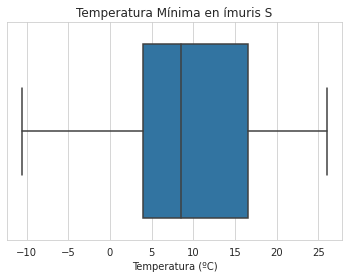

In [ ]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Mínima en ímuris S');

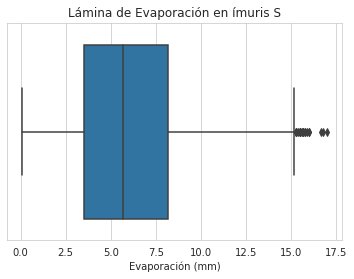

In [ ]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Evap, data=df_meteo, orient='h').set(xlabel='Evaporación (mm)', 
                                                     title='Lámina de Evaporación en ímuris S');

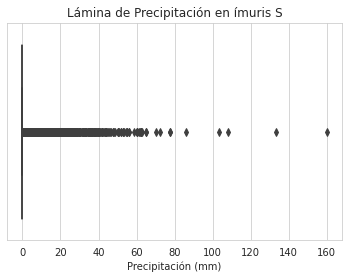

In [ ]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Precip, data=df_meteo, orient='h').set(xlabel='Precipitación (mm)', 
                                                     title='Lámina de Precipitación en ímuris S');

**Analizando periodos de datos**

**Gráficas de Barras: sns.barplot()**

In [7]:
# Seleccionaremos un conjunto de años de 30 años  
df_30 = df_meteo[(df_meteo['Año'] >= 1930) & (df_meteo['Año'] < 1960)]
df_60 = df_meteo[(df_meteo['Año'] >= 1960) & (df_meteo['Año'] < 1990)]
df_90 = df_meteo[(df_meteo['Año'] >= 1990) & (df_meteo['Año'] < 2018)]

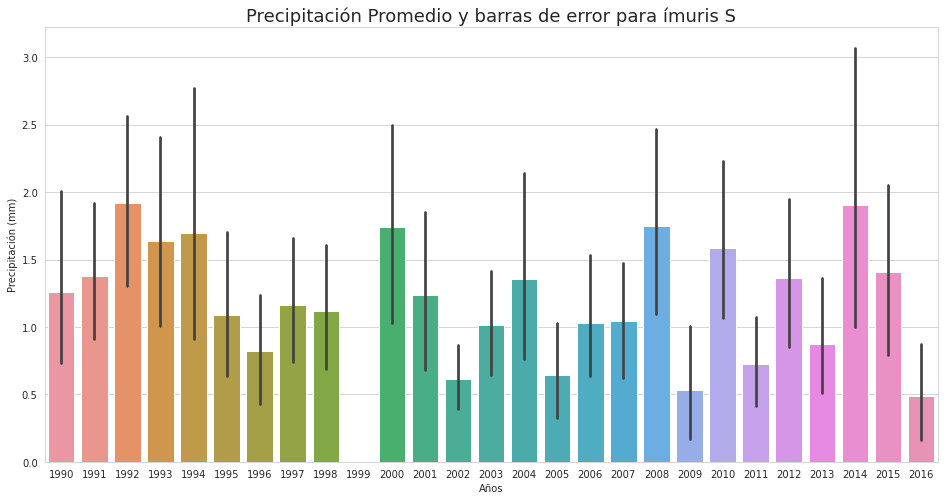

In [8]:
# Gráfica de Precipitación últimos 30 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para ímuris S', fontsize=18)

plt.show()

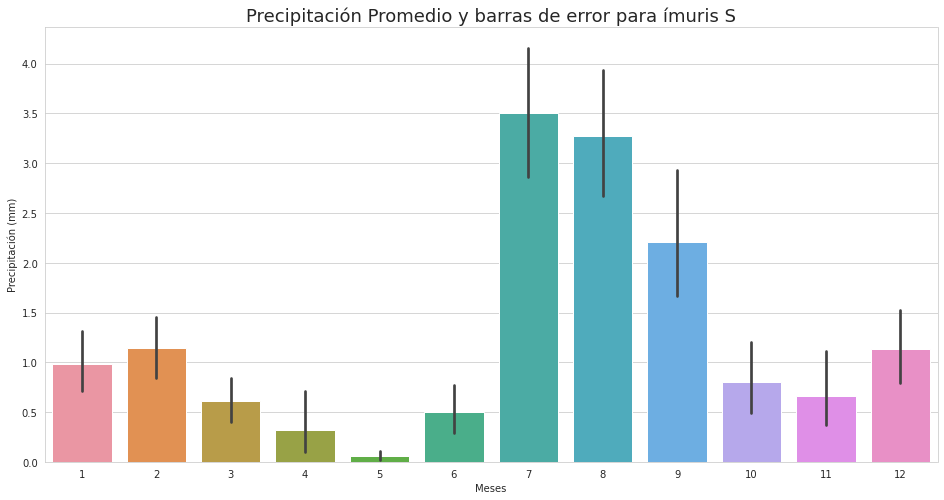

In [9]:

# Gráfica de Precipitación últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para ímuris S', fontsize=18)

plt.show()

**Gráfica de datos con líneas: sns.lineplot()**

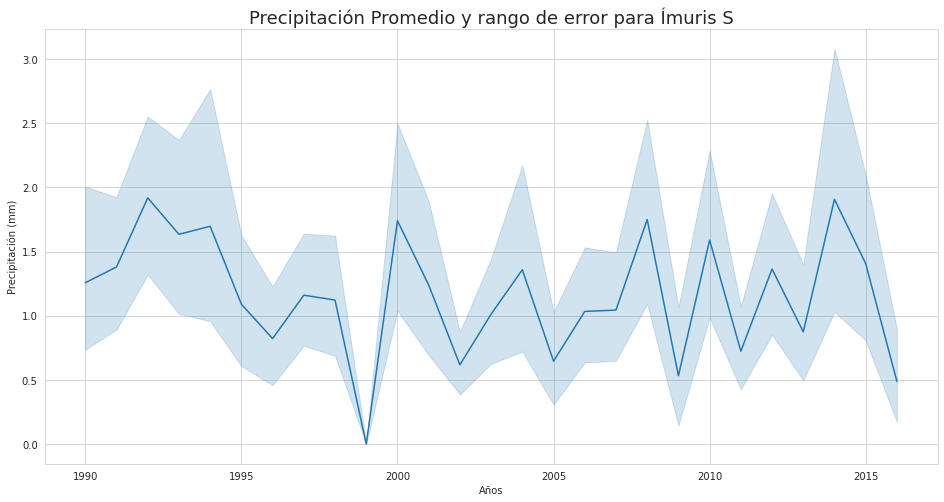

In [10]:
# Gráfica de Precipitación últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Ímuris S', fontsize=18)

plt.show()

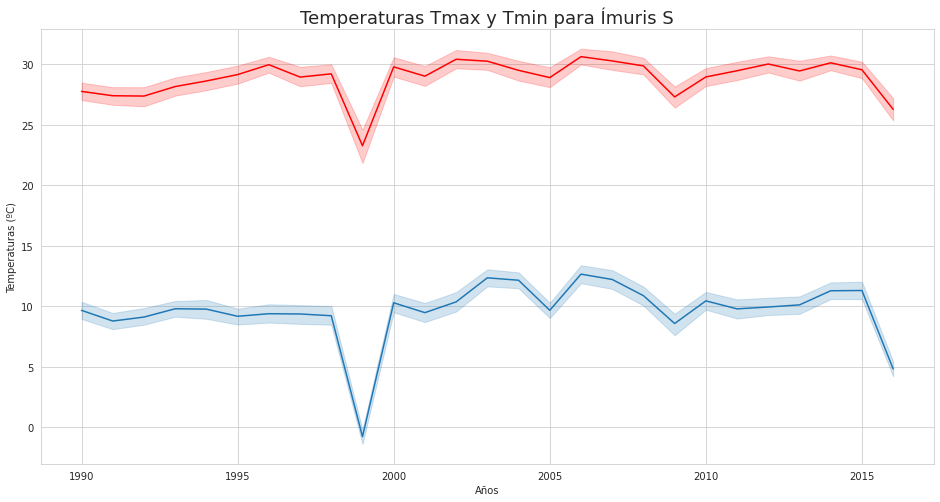

In [11]:
# Gráfica de Temperaturas de últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_90, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_90);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Ímuris S', fontsize=18)

plt.show()

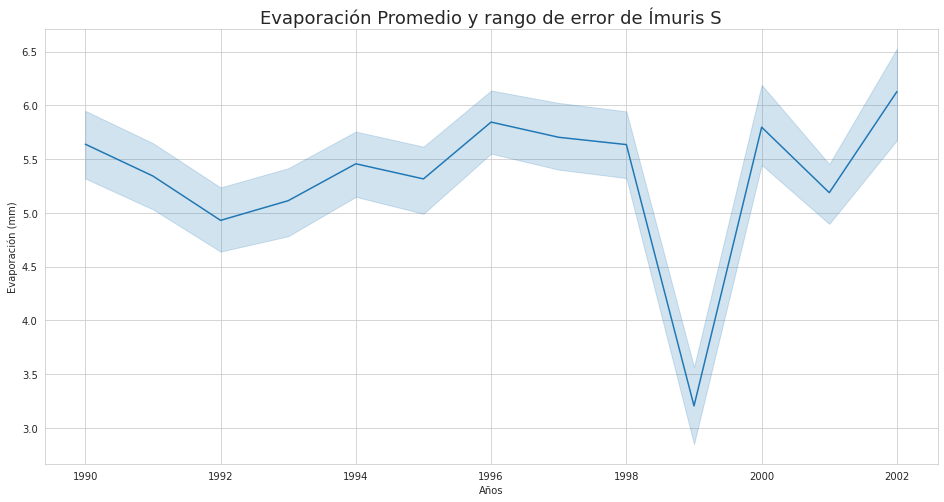

In [12]:
# Gráfica de Evaporación de últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Evap', data=df_90);

plt.xlabel('Años')
plt.ylabel('Evaporación (mm)')
plt.title('Evaporación Promedio y rango de error de Ímuris S', fontsize=18)

plt.show()


**Gráficas de Boxplot agrupado por Mes**

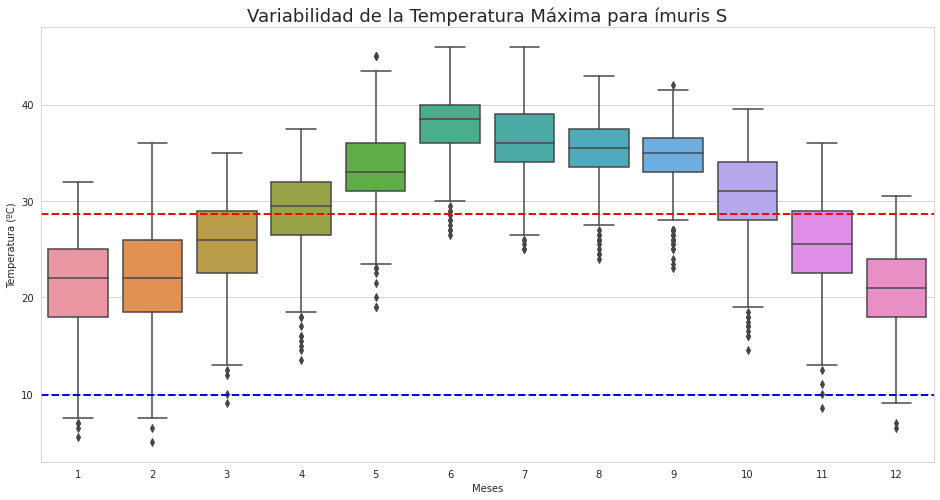

mean(Tmax) =  28.616234436683875
mean(Tmin) =  9.875223173619963
Diff Tmax_ave-Tmin_ave =  18.74101126306391


In [13]:
# Gráfica de Temperaturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_90);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para ímuris S', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))


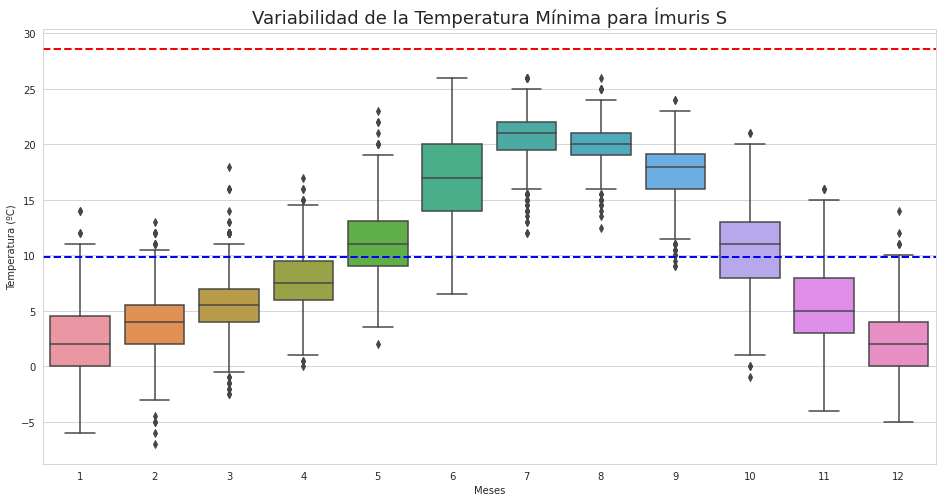

mean(Tmax) =  28.616234436683875
mean(Tmin) =  9.875223173619963
Diff Tmax_ave-Tmin_ave =  18.74101126306391


In [14]:
# Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_90);
# Linea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Ímuris S', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

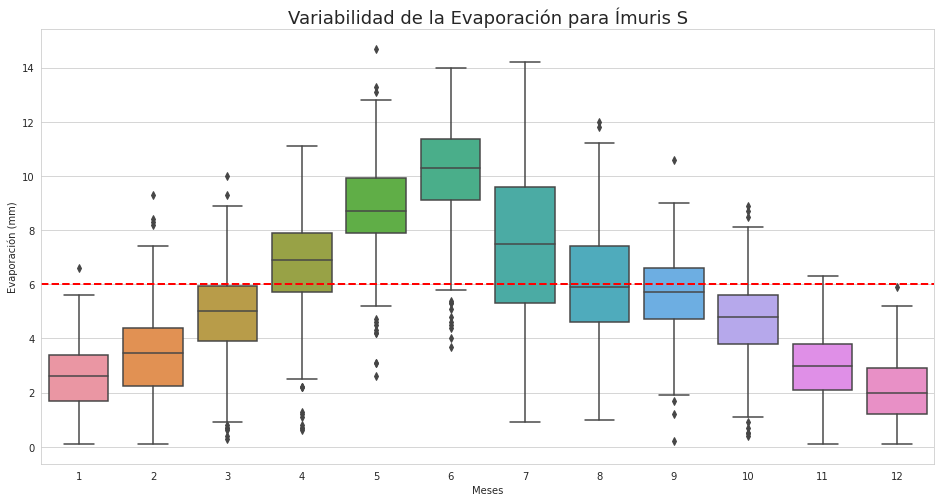

mean(Evap) =  6.026601070257203


In [15]:
# Gráfica de Evaporación en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Evap
Evap_ave = df_meteo.Evap.mean()

# Gráfica de cajas de la Evaporación 
g=sns.boxplot(x='Mes', y='Evap', data=df_90);
# Linea de Evap promedio 
plt.axhline(Evap_ave, color = 'r', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Evaporación (mm)')
plt.title('Variabilidad de la Evaporación para Ímuris S', fontsize=18)

plt.show()

# Imprimir información de Evaporación
print('mean(Evap) = ', Evap_ave)

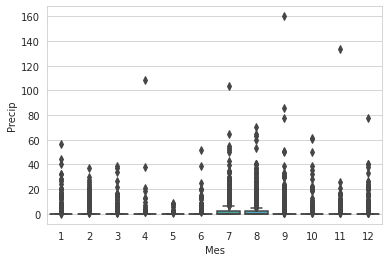

In [16]:
# La gráfica de Boxplot no brinda información de la Precipitación por mes
sns.boxplot(x='Mes' , y='Precip', data=df_90);